In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [2]:
df=pd.read_csv("Student_Performance.csv")
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.replace("Yes",1,inplace=True)
df.replace("No",0,inplace=True)
x=df.iloc[:,:-1]
y=df["Performance Index"]


In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)


In [5]:
dt=DecisionTreeRegressor(max_depth=7)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [6]:
dt.score(x_test,y_test)*100

98.01405027288824

In [7]:
dt.score(x_train,y_train)*100

98.23207864138817

In [10]:
# find best accuracy score
for i in range(1,15):
    dt1=DecisionTreeRegressor(max_depth=i)
    dt1.fit(x_train,y_train)
    print(dt1.score(x_train,y_train)*100,dt1.score(x_test,y_test)*100,i,sep="\n")

63.77213104008239
62.47980734536094
1
78.87021938167034
78.58259704104928
2
89.7519362756647
89.1423979551662
3
93.67189219611295
93.49161102694022
4
96.44217611407038
96.17205649154286
5
97.54108552739547
97.21049002667014
6
98.23207864138817
98.01405027288824
7
98.60296182454213
98.22951855357954
8
98.89784713869105
98.32370117862797
9
99.16113751198269
98.2277997315588
10
99.4006039511925
97.97772025200076
11
99.60677576588502
97.73657300429223
12
99.75924835403087
97.61406887972524
13
99.85554783990939
97.4828370092959
14


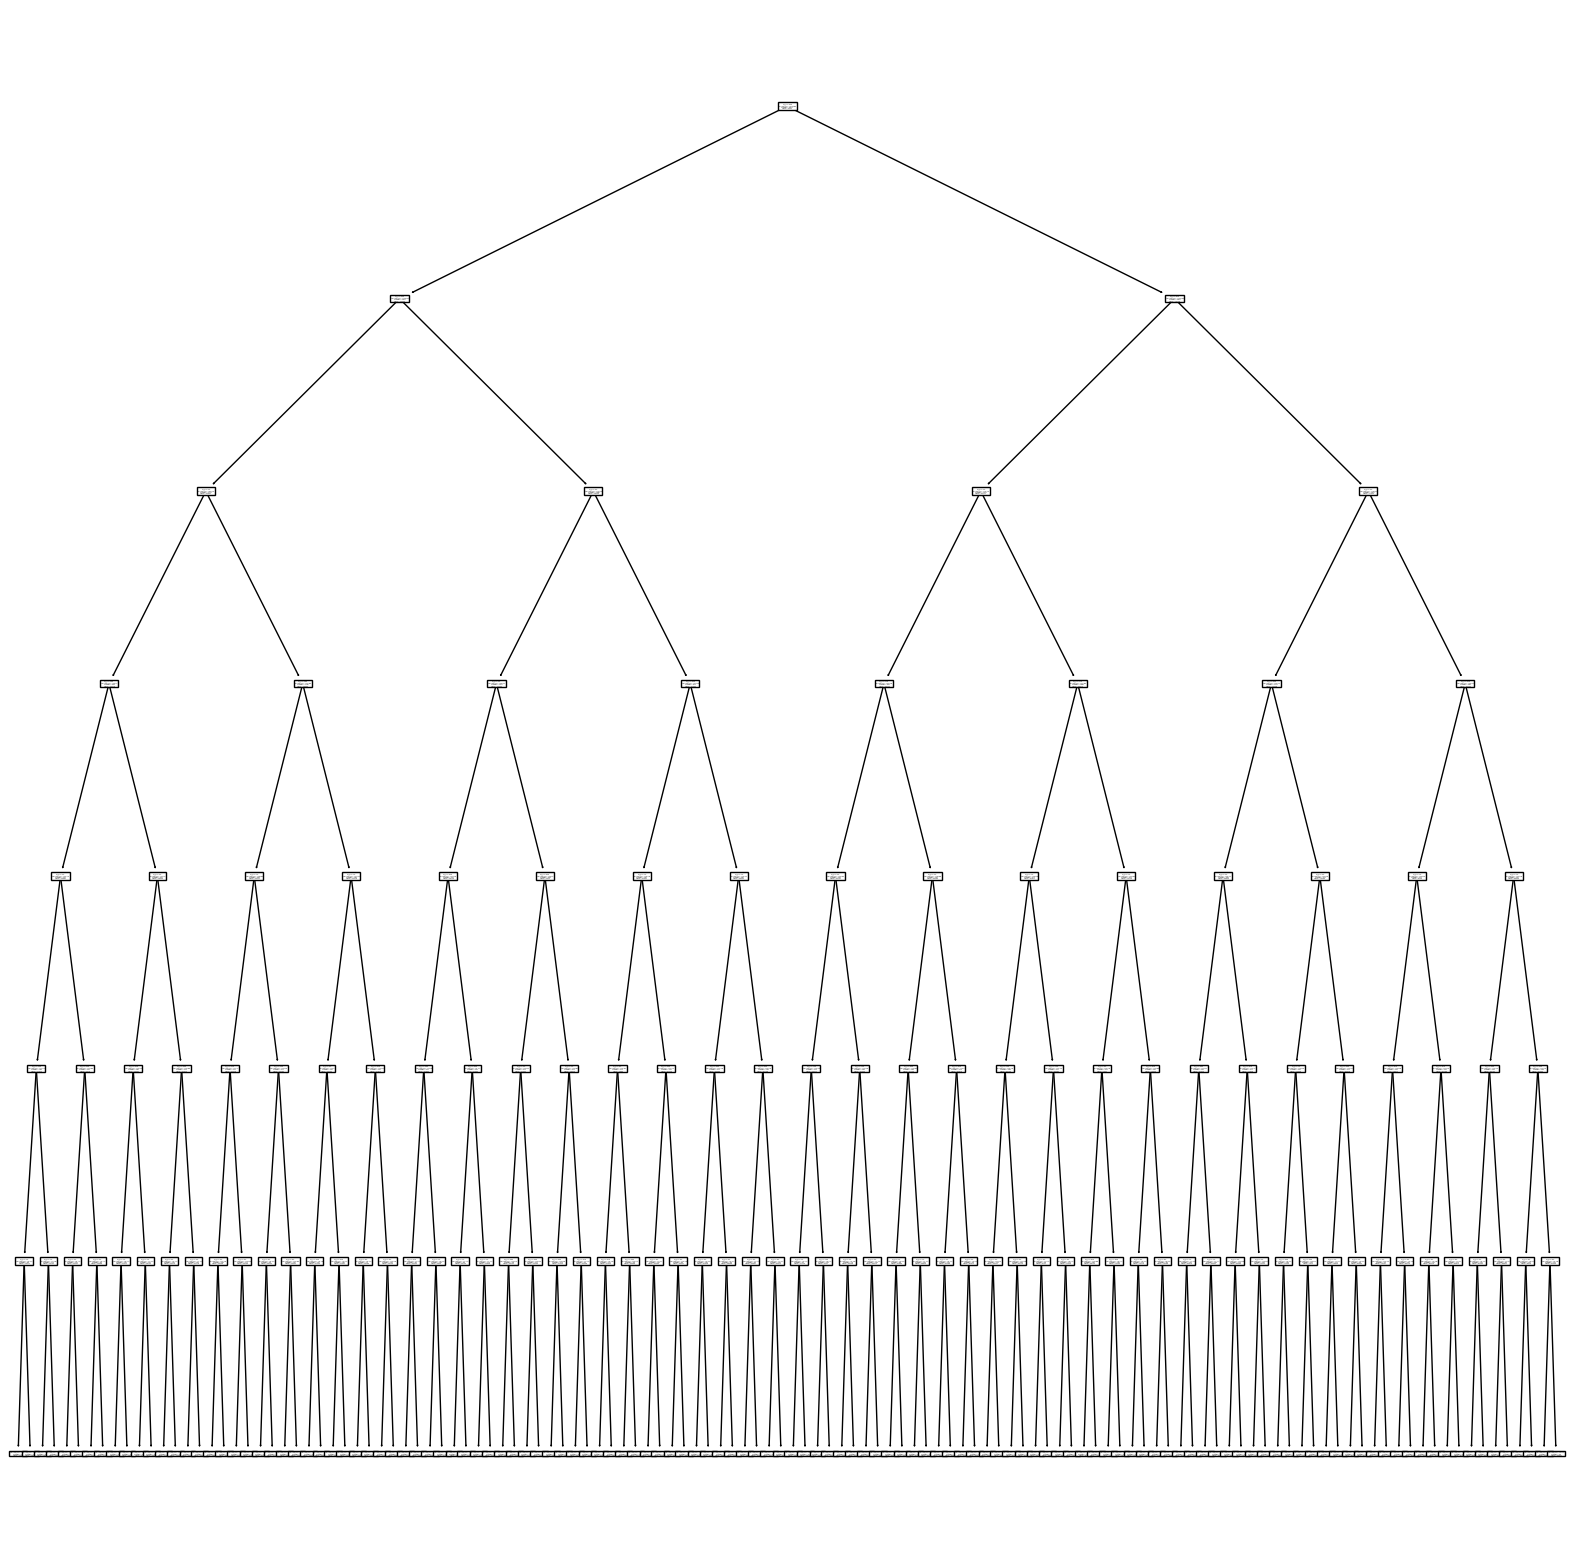

In [9]:
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.show()